### Computational Prob Set 6 -- Integration

#### Name: Zunda Xu (zunda@uchcicago.edu)

#### Problem 1

In [16]:
import numpy as np
from math import sqrt, exp
import matplotlib.pyplot as plt

In [17]:
def approx(g, a, b, N, method):
    i = 0
    sum = 0
    if method == 'midpoints':
        x = a + (b - a)/(2 * N)
        while i < N:
            sum += g(x) * (b - a)/N
            x += (b - a)/N
            i += 1
    elif method == 'trapezoid':
        x = a + (b - a)/N
        sum += g(a) * (b - a)/(2 * N)
        sum += g(b) * (b - a)/(2 * N)
        while i < N - 1:
            sum += g(x) * (b - a)/N
            x += (b - a)/N
            i += 1
    elif method == 'simpsons':
        x = a + (b - a)/(2 * N)
        sum += g(a) * (b - a)/(6 * (N ))
        sum += g(b) * (b - a)/(6 * (N ))
        while i < 2 * N - 2:
            if i % 2 == 0:
                sum += (4/(6 * (N ))) * g(x) * (b-a)
            else:
                sum += (2/(6 * (N ))) * g(x) * (b-a)
            x += (b - a)/(2 * N)
            i += 1
    return sum

In [18]:
g = lambda x: (0.1*x**4 - 1.5*x**3 + 0.53*x**2 + 2*x + 1)
a = -10
b = 10
N = 1000
print(approx(g,a,b,N,'midpoints'))
print(approx(g,a,b,N,'trapezoid'))
print(approx(g,a,b,N,'simpsons'))

4373.319646676187
4373.3607066562
4379.008325996229


#### Problem 2

In [19]:
from scipy.stats import norm
def normal(mu, sigma, N, k):
    Z = np.linspace(mu - k * sigma, mu + k * sigma, N)
    weights = np.zeros(N)
    weights[0] = norm.cdf((Z[0] + Z[1])/2, mu, sigma)
    weights[N-1] = 1- norm.cdf((Z[N-2] + Z[N-1])/2, mu, sigma)
    for i in range(1, N-1):
        weights[i] = norm.cdf((Z[i + 1]+Z[i])/2, mu, sigma) - norm.cdf((Z[i]+Z[i-1])/2, mu, sigma)
    return Z, weights

print(normal(0, 1, 11, 3))
print(normal(0, 1, 11, 3)[1].sum())

(array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ]), array([ 0.00346697,  0.01439745,  0.04894278,  0.11725292,  0.19802845,
        0.23582284,  0.19802845,  0.11725292,  0.04894278,  0.01439745,
        0.00346697]))
1.0


#### Problem 3

In [20]:
def log_normal(mu, sigma, N, k):
    A, weights = normal(mu, sigma, N, k)
    A = np.exp(A)
    return A, weights
print(log_normal(0, 1, 11, 3))

(array([  0.04978707,   0.09071795,   0.16529889,   0.30119421,
         0.54881164,   1.        ,   1.8221188 ,   3.32011692,
         6.04964746,  11.02317638,  20.08553692]), array([ 0.00346697,  0.01439745,  0.04894278,  0.11725292,  0.19802845,
        0.23582284,  0.19802845,  0.11725292,  0.04894278,  0.01439745,
        0.00346697]))


#### Problem 4

In [21]:
expected_Y = np.dot(log_normal(10.5, 0.8, 2000, 4)[0], log_normal(10.5, 0.8, 2000, 4)[1])
print(expected_Y)
true_mean = np.exp(10.5 + 0.8 ** 2/2)
print(true_mean)

50004.9673723
50011.0870085


#### Problem 5

In [22]:
import scipy.optimize as opt
import math

a = -10
b = 10
#approximate each term 
def eqs(x):
    eq1 = x[0] + x[1] + x[2] - (b - a)
    eq2 = x[0] * x[3] + x[1] * x[4] + x[2] * x[5] - ((1/2) * b ** 2 - (1/2) * a ** 2)
    eq3 = x[0] * x[3] ** 2 + x[1] * x[4] ** 2 + x[2] * x[5] ** 2 - ((1/3) * b ** 3 - (1/3) * a ** 3)
    eq4 = x[0] * x[3] ** 3 + x[1] * x[4] ** 3 + x[2] * x[5] ** 3 - ((1/4) * b ** 4 - (1/4) * a ** 4)
    eq5 = x[0] * x[3] ** 4 + x[1] * x[4] ** 4 + x[2] * x[5] ** 4 - ((1/5) * b ** 5 - (1/5) * a ** 5)
    eq6 = x[0] * x[3] ** 5 + x[1] * x[4] ** 5 + x[2] * x[5] ** 5 - ((1/6) * b ** 6 - (1/6) * a ** 6)
    return (eq1, eq2, eq3, eq4, eq5, eq6)
#opt.root is sensitive to init_guess                        
x = opt.root(eqs,(5, 3, 4, -5, 5, 3), tol = 1e-10).x
weights = x[:3]
points = x[3: 6]
gaussian = 0
for i in range(3): 
    gaussian  += (g(points[i])) * (weights[i])
print(gaussian)

4373.33333333


#### Problem 6

In [23]:
from scipy.integrate import quad
print(quad(g, -10, 10)[0])

4373.333333333334


#### Problem 7

In [24]:
g = lambda x, y: 1 if x**2+y**2<=1 else 0 
omega = [-1, 1, -1, 1]
N=1000000

In [25]:
def monte_carlo(N, omega, g):
    sum = 0
    x = np.random.uniform(omega[0],omega[1],N)
    y = np.random.uniform(omega[2],omega[3],N)
    for i in range(N):
         sum += g(x[i],y[i])
    return 4*sum/N

monte_carlo(N,omega,g)

3.141656

#### Problem 8

In [26]:


def is_prime(x):
    if x == 2: 
        return True
    if x < 2 or x % 2 == 0: 
        return False
    return not any(x % i == 0 for i in range(3, int(sqrt(x)) + 1, 2))

def get_prime(n):
    primes = []
    i = 1
    k = 1
    while i <= n :
        if is_prime(k + 1) == True:
            primes.append(k + 1)
            i += 1
        k += 1
    primes = np.asarray(primes)
    return primes

def p8(n, d, t):
    x = np.zeros((n, d))
    primes = get_prime(d)
    if t == 'Weyl':
         primes = primes ** 0.5 * n - np.floor(primes ** 0.5 * n)
    if t == 'Haber':
         primes =(n*(n+1)/2*np.sqrt(primes))-np.floor(n*(n+1)/2*np.sqrt(primes))
    if t == 'Niederreiter':
        sequence = np.zeros(d)
        for j in range(d):
            m = j + 1
            sequence[j] = (n*2**(m/(m+1)))- int(n*2**(m/(m+1)))
        return sequence
    if t == 'Baker':
        primes = (n * np.exp(primes)) - np.floor(n * np.exp(primes))
       
    return primes

print(p8(5, 2,'Weyl'))
print(p8(5, 2,'Haber'))
print(p8(5, 2,'Niederreiter'))
print(p8(5, 2,'Baker'))


[ 0.07106781  0.66025404]
[ 0.21320344  0.98076211]
[ 0.07106781  0.93700526]
[ 0.94528049  0.42768462]


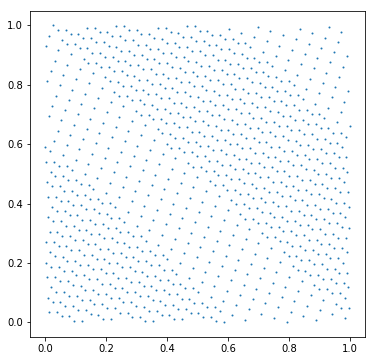

In [27]:
x_coordi = np.zeros(1000)
y_coordi = np.zeros(1000)
for i in range(1,1001):
    x, y = p8(i, 2, "Niederreiter")
    y_coordi[i-1] = y
    x_coordi[i-1] = x
plt.figure(figsize = (6,6))
plt.plot(x_coordi, y_coordi, "o", markersize = 1)
plt.show()

#### Problem 9

In [28]:
def quasi_Weyl(N, omega, g):
    sum = 0
    A = np.zeros((N, 2))
    for i in range(N):
        A[i,:] =  p8(i+1, 2, 'Weyl')
        sum += g(A[i, 0], A[i, 1])
    return 4*sum/N
def quasi_Haber(N, omega , g ):
    sum = 0
    A = np.zeros((N, 2))
    for i in range(N):
        A[i,:] =  p8(i+1, 2, 'Haber')
        sum += g(A[i, 0], A[i, 1])
    return 4*sum/N
def quasi_Niederreiter(N, omega, g ):
    sum = 0
    A = np.zeros((N, 2))
    for i in range(N):
        A[i,:] =  p8(i+1, 2, 'Niederreiter')
        sum += g(A[i, 0], A[i, 1])
    return 4*sum/N
def quasi_Baker(N, omega , g ):
    sum = 0
    A = np.zeros((N, 2))
    for i in range(N):
        A[i,:] =  p8(i+1, 2, 'Baker')
        sum += g(A[i, 0], A[i, 1])
   
    return 4*sum/N

In [29]:
print(quasi_Weyl(100000,omega,g))
print(quasi_Haber(10000,omega,g))
print(quasi_Niederreiter(10000,omega,g))
print(quasi_Baker(10000,omega,g))

3.14036
3.1512
3.1464
3.144
